In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import datasets
%matplotlib inline

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df = iris_df[['sepal length (cm)','sepal width (cm)']]
iris_df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [5]:
dist_matrix = make_dist_matrix(iris_df)

In [10]:
iris_df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [12]:
def db_scan(df,radius,dist_matrix):
    label_num = 1
    df['label'] = 0
    starting_point = df.sample(n=1)
#     print(starting_point)
    df.set_value(starting_point.index, 'label', label_num)
#     df['label']= df['label'].apply(nanToZero)
    print(df)
    df = find_near_points(df,dist_matrix,starting_point.index,label_num,radius)
    while df[df['label']==0].shape[0] != 0:
        label_num +=1
        starting_point = df[df['label']==0].sample(n=1)
        df.set_value(starting_point.index, 'label', label_num)
        df = find_near_points(df,dist_matrix,starting_point.index,label_num,radius)
    return df
    
def make_dist_matrix(df):
    ### passed dataframe must only contain numeric values
    length = df.shape[0]
    dist_matrix = np.zeros(shape=(length,length))
    
    for a in range(length):
        
        a_row = df.loc[a,:]
    
        for b in range(length):
            
            b_row = df.loc[b,:]
            dist_matrix[a,b] = np.linalg.norm(a_row-b_row)
    
    return dist_matrix
            
def find_near_points(df,dist_matrix,index,label,radius):
    #calcDistFromPoint()
    point_row = dist_matrix[:,index]
    for i in range(len(point_row)):
        dist = point_row[i]
        if type(point_row[i]) == np.ndarray:
            dist = point_row[i,0]
            
        current_row = df.loc[i,:]
        
        if (dist <= radius and current_row['label'] != label):
            print(i)
            print(dist)
            df.set_value(i,'label',label)
            df = find_near_points(df,dist_matrix,i,label,radius)
    
    return df
def nanToZero(row):
    if np.isnan(row):
        return 0
    else:
        return row

In [13]:
len(dist_matrix[0,:])

150

In [19]:
iris_df['label'] = 0
iris_df = db_scan(iris_df,.3,dist_matrix)
iris_df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


     sepal length (cm)  sepal width (cm)  label
0                  5.1               3.5      0
1                  4.9               3.0      0
2                  4.7               3.2      0
3                  4.6               3.1      0
4                  5.0               3.6      0
5                  5.4               3.9      0
6                  4.6               3.4      0
7                  5.0               3.4      0
8                  4.4               2.9      0
9                  4.9               3.1      0
10                 5.4               3.7      0
11                 4.8               3.4      0
12                 4.8               3.0      0
13                 4.3               3.0      0
14                 5.8               4.0      0
15                 5.7               4.4      0
16                 5.4               3.9      0
17                 5.1               3.5      0
18                 5.7               3.8      0
19                 5.1               3.8

,sepal length (cm),sepal width (cm),label
0,5.1,3.5,3
1,4.9,3.0,3
2,4.7,3.2,3
3,4.6,3.1,3
4,5.0,3.6,3
5,5.4,3.9,3
6,4.6,3.4,3
7,5.0,3.4,3
8,4.4,2.9,3
9,4.9,3.1,3


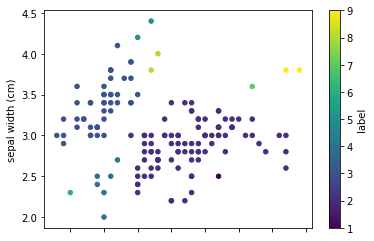

In [20]:
iris_df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)',c='label',colormap='viridis')

In [27]:
import sys
sys.executable

'/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7'

In [28]:
sys.setrecursionlimit(150*150)